In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("cleaned_phone_usage_india.csv")

In [3]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df[['Location', 'Phone Brand', 'Primary Use']] = df[['Location', 'Phone Brand', 'Primary Use']].apply(LabelEncoder().fit_transform)
df.head()

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,53,Male,8,8,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,0
1,60,Other,3,6,Android,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,2
2,37,Female,0,3,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,1
3,32,Male,9,7,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,1
4,16,Male,8,9,Android,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,3


In [4]:
# One hot Encoding

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[['Gender', 'OS']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Gender', 'OS']))
encoded_df.head()

,Gender_Female,Gender_Male,Gender_Other,OS_Android,OS_iOS
0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0


In [5]:
final_df = pd.concat([df, encoded_df], axis=1)
final_df.head()

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Gender_Female,Gender_Male,Gender_Other,OS_Android,OS_iOS
0,53,Male,8,8,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,0,0.0,1.0,0.0,1.0,0.0
1,60,Other,3,6,Android,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,2,0.0,0.0,1.0,1.0,0.0
2,37,Female,0,3,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,1,1.0,0.0,0.0,1.0,0.0
3,32,Male,9,7,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,1,0.0,1.0,0.0,1.0,0.0
4,16,Male,8,9,Android,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,3,0.0,1.0,0.0,1.0,0.0


In [6]:
# Drop the columns

final_df = final_df.drop(['Gender', 'OS'], axis=1)
final_df.head()

,Age,Location,Phone Brand,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Gender_Female,Gender_Male,Gender_Other,OS_Android,OS_iOS
0,53,8,8,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,0,0.0,1.0,0.0,1.0,0.0
1,60,3,6,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,2,0.0,0.0,1.0,1.0,0.0
2,37,0,3,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,1,1.0,0.0,0.0,1.0,0.0
3,32,9,7,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,1,0.0,1.0,0.0,1.0,0.0
4,16,8,9,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,3,0.0,1.0,0.0,1.0,0.0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df)

In [ ]:
# using elbow method to find the optimal k value

In [9]:
inertia = [] # inertia values (sum of squared distances of samples to their closest cluster center)
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

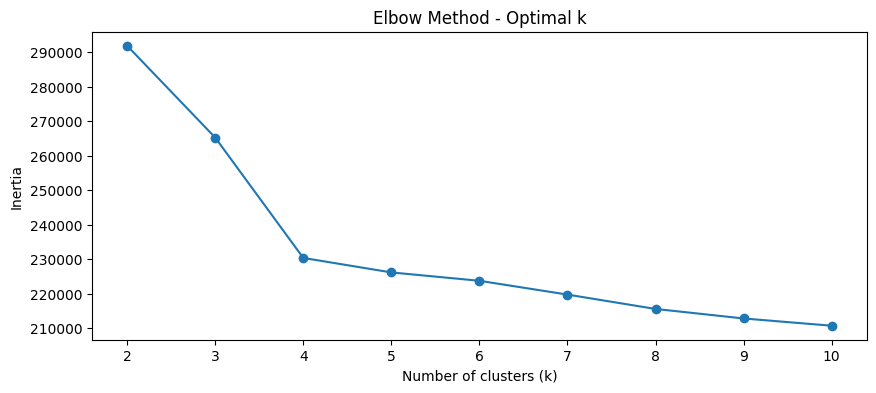

In [10]:
plt.figure(figsize=(10,4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

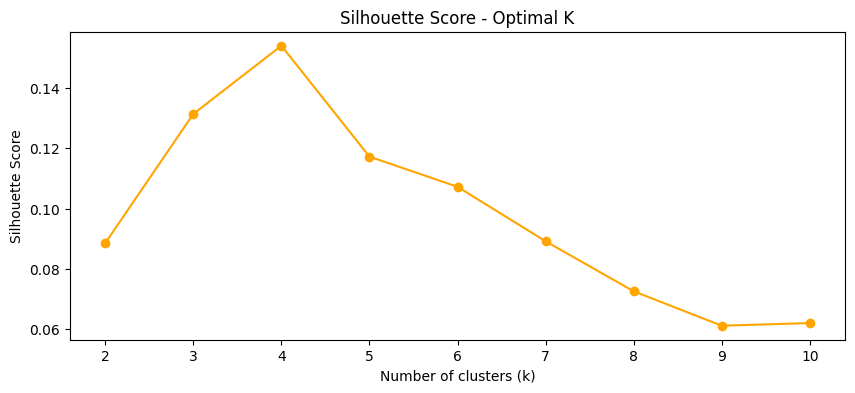

In [11]:
plt.figure(figsize=(10,4))
plt.plot(K, silhouette, marker='o', color='orange')
plt.title('Silhouette Score - Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [12]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(X_scaled)   # "Cluster" column in your data shows which group (or cluster) each row belongs to after clustering.

In [13]:

final_df.head(10)

,Age,Location,Phone Brand,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Gender_Female,Gender_Male,Gender_Other,OS_Android,OS_iOS,Cluster
0,53,8,8,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,0,0.0,1.0,0.0,1.0,0.0,0
1,60,3,6,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,2,0.0,0.0,1.0,1.0,0.0,1
2,37,0,3,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,1,1.0,0.0,0.0,1.0,0.0,2
3,32,9,7,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,1,0.0,1.0,0.0,1.0,0.0,0
4,16,8,9,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,3,0.0,1.0,0.0,1.0,0.0,0
5,21,5,5,5.4,10.6,210.6,25,4.2,6285,0.6,4.8,1749,1,0.0,1.0,0.0,1.0,0.0,0
6,57,7,0,6.0,35.2,154.5,123,0.8,2653,2.9,2.3,1073,3,1.0,0.0,0.0,0.0,1.0,3
7,56,6,6,3.1,43.5,125.3,188,2.3,9767,5.2,5.0,1136,1,0.0,0.0,1.0,1.0,0.0,1
8,46,6,5,5.3,46.4,21.3,194,3.7,2870,6.1,2.8,1253,1,1.0,0.0,0.0,1.0,0.0,2
9,44,6,0,9.9,10.6,180.2,84,4.8,9193,7.6,0.4,168,0,0.0,0.0,1.0,0.0,1.0,3



 Cluster Centers (Scaled):
[[-6.38813784e-03 -8.49061285e-03  1.74300765e-01  1.97311166e-02
   6.73009553e-04  4.42199003e-04  7.60846978e-03 -9.26334965e-03
  -1.61675859e-02 -5.94932449e-03 -3.15065620e-03 -8.98395735e-03
  -3.88132836e-03 -7.13744171e-01  1.42696292e+00 -7.06806944e-01
   3.34003056e-01 -3.34003056e-01]
 [ 8.68846652e-03 -6.98879822e-03  1.64602392e-01 -4.96802026e-03
   1.31068306e-02 -1.27869581e-02 -4.38678517e-03  1.59745209e-02
  -1.39275410e-02  2.48498999e-02  1.10980288e-02  1.28392423e-02
  -1.18908004e-02 -7.13744171e-01 -7.00789057e-01  1.41481349e+00
   3.34003056e-01 -3.34003056e-01]
 [-2.08821071e-03  1.59958757e-02  1.86648390e-01 -1.17827893e-02
   7.32359655e-04  2.06511889e-02 -3.35948928e-03 -5.22173919e-03
   2.04934552e-02 -7.45050026e-03  1.78655394e-03  1.50597496e-03
   1.48975032e-02  1.40106223e+00 -7.00789057e-01 -7.06806944e-01
   3.34003056e-01 -3.34003056e-01]
 [-5.50763826e-04 -3.19300784e-03 -1.57143320e+00 -7.35469410e-03
  -4.3053

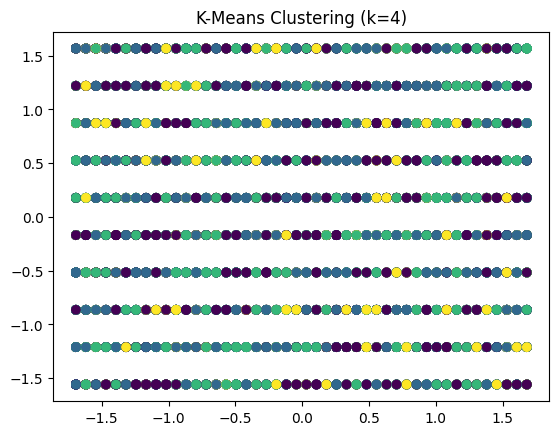

In [13]:
# Cluster center
print("\n Cluster Centers (Scaled):")
print(kmeans.cluster_centers_)

# Silhouette Score for final model
score = silhouette_score(X_scaled, final_df['Cluster'])
print(f"\n Silhouette Score for k={best_k}: {score:.3f}")

# Check cluster distribution
print("\n Cluster counts:")
print(final_df['Cluster'].value_counts())

# Visualize 2D clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=final_df['Cluster'], cmap='viridis')
plt.title(f'K-Means Clustering (k={best_k})')
plt.show()

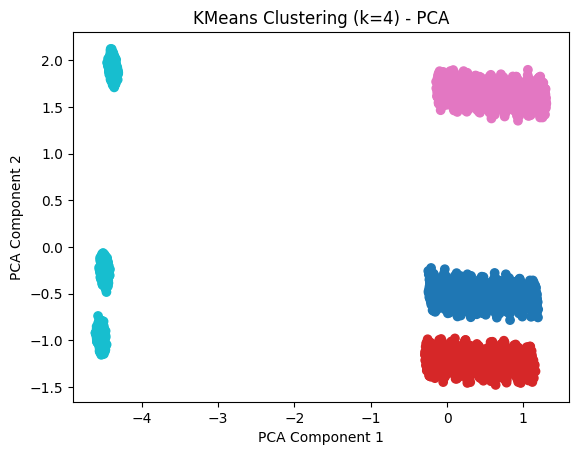

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters in PCA space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_df['Cluster'], cmap='tab10')
plt.title(f'KMeans Clustering (k={best_k}) - PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [15]:
# How many points are in each cluster
cluster_sizes = final_df['Cluster'].value_counts()
print(cluster_sizes)

Cluster
2    5426
1    5259
0    5226
3    1775
Name: count, dtype: int64


In [16]:
# To see what class is most frequent in each cluster
cluster_primary_use = final_df.groupby('Cluster')['Primary Use'].agg(lambda x: x.mode()[0])
print(cluster_primary_use)


Cluster
0    1
1    2
2    4
3    0
Name: Primary Use, dtype: int64


Cluster 0: the most common primary use is class 1

Cluster 1: the most common primary use is class 2

Cluster 2: the most common primary use is class 4

Cluster 3: the most common primary use is class 0

In [66]:
# map numeric codes to class names

class_map = {0: 'Education', 1: 'Entertainment', 2: 'Gaming', 3: 'Social media', 4: 'Work'}

result = final_df.groupby('Cluster')['Primary Use'].agg(lambda x: x.mode()[0])
result_named = result.map(class_map)
print(result_named)

Cluster
0    Entertainment
1           Gaming
2             Work
3        Education
Name: Primary Use, dtype: object


In [ ]:
cluster0_df = final_df[final_df['Cluster'] == 0]


In [19]:
cluster0_df

,Age,Location,Phone Brand,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Gender_Female,Gender_Male,Gender_Other,OS_Android,OS_iOS,Cluster
0,53,8,8,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,0,0.0,1.0,0.0,1.0,0.0,0
3,32,9,7,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,1,0.0,1.0,0.0,1.0,0.0,0
4,16,8,9,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,3,0.0,1.0,0.0,1.0,0.0,0
5,21,5,5,5.4,10.6,210.6,25,4.2,6285,0.6,4.8,1749,1,0.0,1.0,0.0,1.0,0.0,0
12,53,1,6,10.5,1.4,33.7,137,4.5,7854,7.2,1.4,240,0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17664,30,5,9,5.5,43.5,116.6,108,1.5,6440,3.7,3.1,639,3,0.0,1.0,0.0,1.0,0.0,0
17667,42,0,7,7.8,22.6,86.4,111,2.7,4373,3.4,3.1,1082,0,0.0,1.0,0.0,1.0,0.0,0
17670,32,8,9,3.9,37.5,271.3,38,5.3,1525,3.6,4.1,1274,4,0.0,1.0,0.0,1.0,0.0,0
17674,34,4,8,1.1,15.3,267.4,19,5.4,8216,6.5,4.3,671,1,0.0,1.0,0.0,1.0,0.0,0


In [45]:
cluster0_df['Primary Use'].value_counts()

Primary Use
1    1081
0    1045
4    1045
3    1041
2    1014
Name: count, dtype: int64

In [46]:
cluster0_df['Location'].value_counts()

Location
0    557
9    547
2    533
5    532
1    530
6    520
4    510
8    503
3    500
7    494
Name: count, dtype: int64

In [ ]:
cluster0_df['Phone Brand'].value_counts()

Phone Brand
9    596
3    596
6    591
7    590
8    579
2    579
1    572
4    563
5    560
Name: count, dtype: int64

In [52]:
cluster1_df = final_df[final_df['Cluster'] == 1]

In [54]:
cluster1_df['Primary Use'].value_counts()


Primary Use
2    1113
0    1084
4    1034
1    1014
3    1014
Name: count, dtype: int64

In [55]:
cluster1_df['Location'].value_counts()


Location
1    550
3    538
5    538
6    529
0    529
9    522
2    521
8    520
4    507
7    505
Name: count, dtype: int64

In [56]:
cluster1_df['Phone Brand'].value_counts()

Phone Brand
4    644
3    611
8    606
5    575
7    570
2    568
9    566
1    561
6    558
Name: count, dtype: int64

In [57]:
cluster2_df = final_df[final_df['Cluster'] == 2]

In [58]:
cluster2_df['Primary Use'].value_counts()

Primary Use
4    1125
0    1101
2    1091
3    1082
1    1027
Name: count, dtype: int64

In [59]:
cluster2_df['Location'].value_counts()

Location
5    574
9    572
3    556
6    552
2    547
1    540
8    533
7    528
0    523
4    501
Name: count, dtype: int64

In [60]:
cluster2_df['Phone Brand'].value_counts()

Phone Brand
9    641
6    613
8    612
3    609
7    604
4    600
1    596
5    581
2    570
Name: count, dtype: int64

In [61]:
cluster3_df = final_df[final_df['Cluster'] == 3]

In [62]:
cluster3_df['Primary Use'].value_counts()

Primary Use
0    371
3    364
2    358
4    353
1    329
Name: count, dtype: int64

In [63]:
cluster3_df['Location'].value_counts()

Location
2    189
6    188
4    182
3    181
5    180
0    176
9    174
7    173
1    166
8    166
Name: count, dtype: int64

In [64]:
cluster3_df['Phone Brand'].value_counts()

Phone Brand
0    1775
Name: count, dtype: int64

In [65]:
for c in final_df['Cluster'].unique():
    cdf = final_df[final_df['Cluster'] == c]
    print(f"\nCluster {c} summary:")
    print(cdf.describe(include='all'))  # For numeric and categorical overview



Cluster 0 summary:
               Age     Location  Phone Brand  Screen Time (hrs/day)  \
count  5226.000000  5226.000000  5226.000000            5226.000000   
mean     37.499043     4.462495     5.021431               6.608974   
std      13.384262     2.901151     2.588366               3.189983   
min      15.000000     0.000000     1.000000               1.000000   
25%      26.000000     2.000000     3.000000               3.800000   
50%      38.000000     4.000000     5.000000               6.800000   
75%      49.000000     7.000000     7.000000               9.300000   
max      60.000000     9.000000     9.000000              12.000000   

       Data Usage (GB/month)  Calls Duration (mins/day)  \
count            5226.000000                5226.000000   
mean               25.420762                 151.443398   
std                14.091067                  83.963622   
min                 1.000000                   5.000000   
25%                13.500000                 

In [33]:
for c in final_df['Cluster'].unique(): 
    print(f"Cluster {c} summary:")
    cdf = final_df[final_df['Cluster'] == c]
    print(cdf.describe(include='all'))
    print("")  


Cluster 0 summary:
               Age     Location  Phone Brand  Screen Time (hrs/day)  \
count  5226.000000  5226.000000  5226.000000            5226.000000   
mean     37.499043     4.462495     5.021431               6.608974   
std      13.384262     2.901151     2.588366               3.189983   
min      15.000000     0.000000     1.000000               1.000000   
25%      26.000000     2.000000     3.000000               3.800000   
50%      38.000000     4.000000     5.000000               6.800000   
75%      49.000000     7.000000     7.000000               9.300000   
max      60.000000     9.000000     9.000000              12.000000   

       Data Usage (GB/month)  Calls Duration (mins/day)  \
count            5226.000000                5226.000000   
mean               25.420762                 151.443398   
std                14.091067                  83.963622   
min                 1.000000                   5.000000   
25%                13.500000                  

In [38]:

cluster_num = 0

cdf = final_df[final_df['Cluster'] == cluster_num]
print(f"Summary for cluster {cluster_num}:")
print(cdf.describe(include='all'))




Summary for cluster 0:
               Age     Location  Phone Brand  Screen Time (hrs/day)  \
count  5226.000000  5226.000000  5226.000000            5226.000000   
mean     37.499043     4.462495     5.021431               6.608974   
std      13.384262     2.901151     2.588366               3.189983   
min      15.000000     0.000000     1.000000               1.000000   
25%      26.000000     2.000000     3.000000               3.800000   
50%      38.000000     4.000000     5.000000               6.800000   
75%      49.000000     7.000000     7.000000               9.300000   
max      60.000000     9.000000     9.000000              12.000000   

       Data Usage (GB/month)  Calls Duration (mins/day)  \
count            5226.000000                5226.000000   
mean               25.420762                 151.443398   
std                14.091067                  83.963622   
min                 1.000000                   5.000000   
25%                13.500000              

In [ ]:

cluster_num = 1

cdf = final_df[final_df['Cluster'] == cluster_num]
print(f"Summary for cluster {cluster_num}:")
print(cdf.describe(include='all'))


Summary for cluster 1:
               Age     Location  Phone Brand  Screen Time (hrs/day)  \
count  5259.000000  5259.000000  5259.000000            5259.000000   
mean     37.700133     4.466819     4.993535               6.530614   
std      13.385896     2.874944     2.562412               3.142387   
min      15.000000     0.000000     1.000000               1.000000   
25%      26.000000     2.000000     3.000000               3.800000   
50%      38.000000     4.000000     5.000000               6.600000   
75%      49.000000     7.000000     7.000000               9.200000   
max      60.000000     9.000000     9.000000              12.000000   

       Data Usage (GB/month)  Calls Duration (mins/day)  \
count            5259.000000                5259.000000   
mean               25.596349                 150.319966   
std                14.111739                  84.609707   
min                 1.000000                   5.200000   
25%                13.300000              

In [ ]:

cluster_num = 2

cdf = final_df[final_df['Cluster'] == cluster_num]
print(f"Summary for cluster {cluster_num}:")
print(cdf.describe(include='all'))


Summary for cluster 2:
               Age     Location  Phone Brand  Screen Time (hrs/day)  \
count  5426.000000  5426.000000  5426.000000            5426.000000   
mean     37.556395     4.532989     5.056948               6.508994   
std      13.248600     2.873447     2.593057               3.178671   
min      15.000000     0.000000     1.000000               1.000000   
25%      26.000000     2.000000     3.000000               3.700000   
50%      37.000000     5.000000     5.000000               6.500000   
75%      49.000000     7.000000     7.000000               9.300000   
max      60.000000     9.000000     9.000000              12.000000   

       Data Usage (GB/month)  Calls Duration (mins/day)  \
count             5426.00000                5426.000000   
mean                25.42160                 153.159565   
std                 14.17828                  85.602911   
min                  1.00000                   5.000000   
25%                 13.02500              

In [41]:

cluster_num = 3

cdf = final_df[final_df['Cluster'] == cluster_num]
print(f"Summary for cluster {cluster_num}:")
print(cdf.describe(include='all'))


Summary for cluster 3:
               Age     Location  Phone Brand  Screen Time (hrs/day)  \
count  1775.000000  1775.000000       1775.0            1775.000000   
mean     37.576901     4.477746          0.0               6.523042   
std      13.343169     2.842827          0.0               3.192496   
min      15.000000     0.000000          0.0               1.000000   
25%      26.000000     2.000000          0.0               3.800000   
50%      38.000000     4.000000          0.0               6.600000   
75%      49.000000     7.000000          0.0               9.300000   
max      60.000000     9.000000          0.0              12.000000   

       Data Usage (GB/month)  Calls Duration (mins/day)  \
count            1775.000000                1775.000000   
mean               24.803268                 149.151606   
std                14.067752                  86.526315   
min                 1.000000                   5.100000   
25%                12.550000              

In [24]:
feature_means = final_df.groupby('Cluster').mean(numeric_only=True)
print(feature_means)

               Age  Location  Phone Brand  Screen Time (hrs/day)  \
Cluster                                                            
0        37.499043  4.462495     5.021431               6.608974   
1        37.700133  4.466819     4.993535               6.530614   
2        37.556395  4.532989     5.056948               6.508994   
3        37.576901  4.477746     0.000000               6.523042   

         Data Usage (GB/month)  Calls Duration (mins/day)  \
Cluster                                                     
0                    25.420762                 151.443398   
1                    25.596349                 150.319966   
2                    25.421600                 153.159565   
3                    24.803268                 149.151606   

         Number of Apps Installed  Social Media Time (hrs/day)  \
Cluster                                                          
0                      105.004975                     3.237639   
1                      104

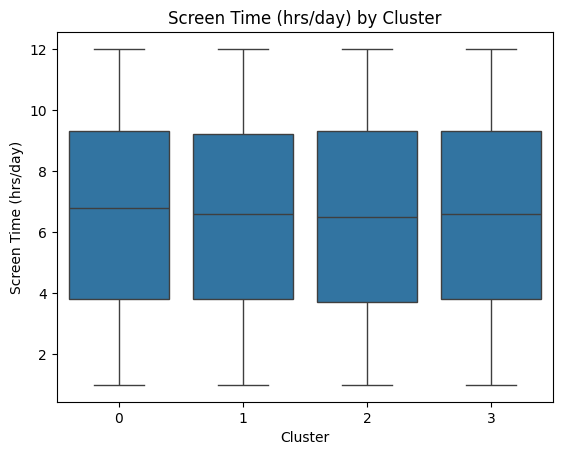

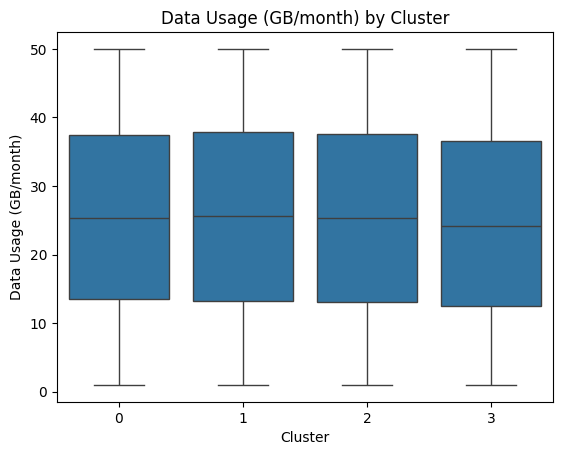

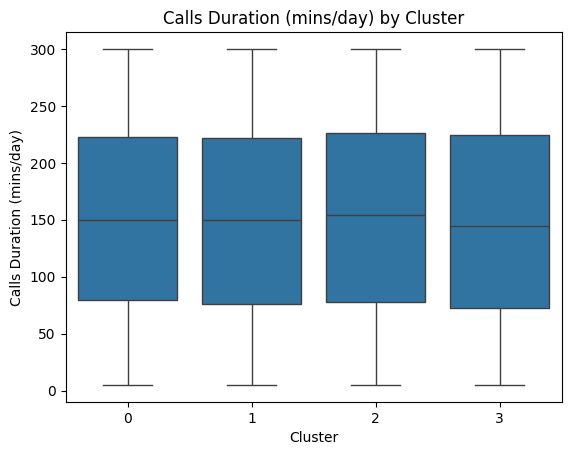

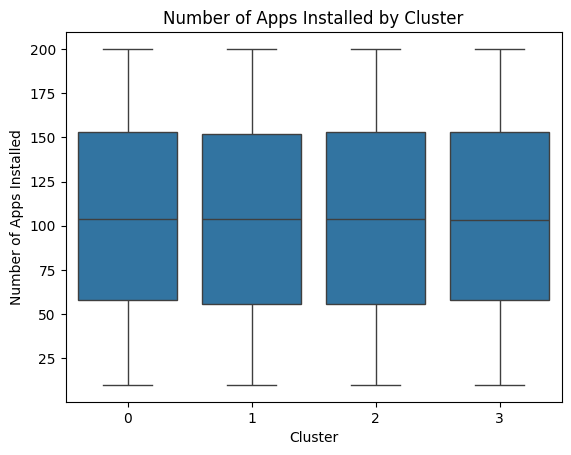

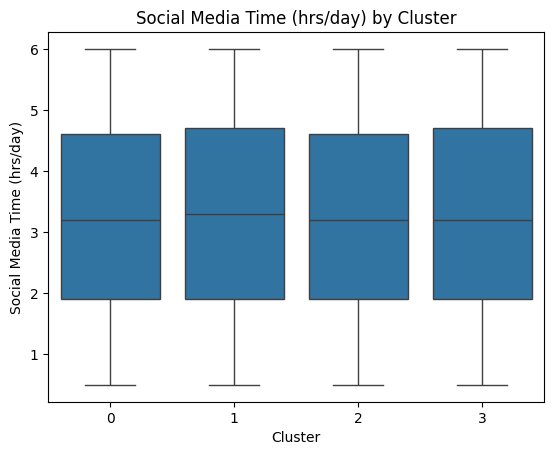

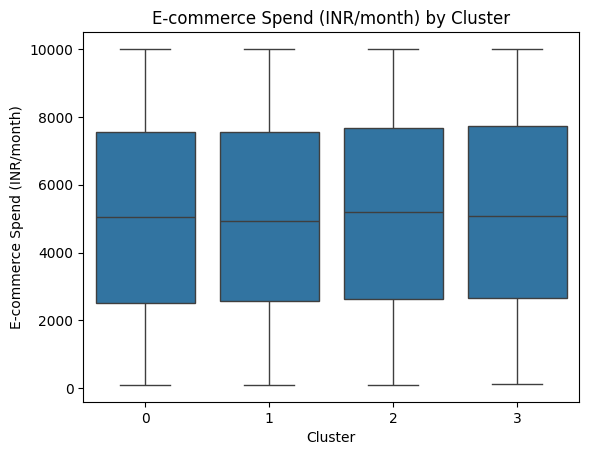

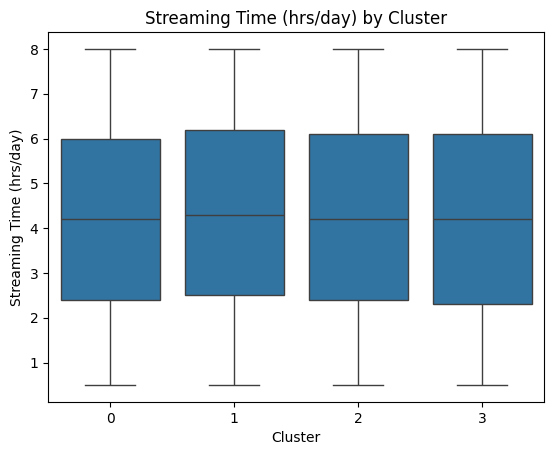

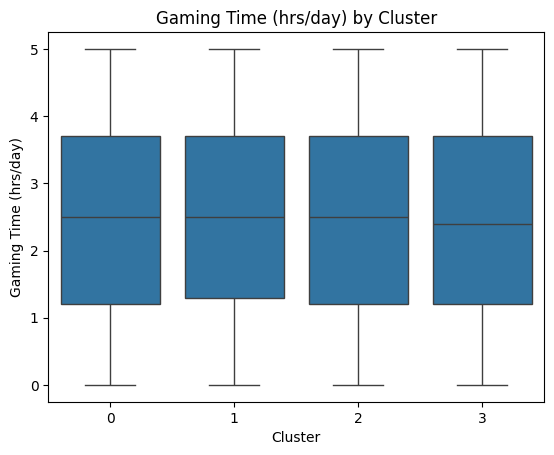

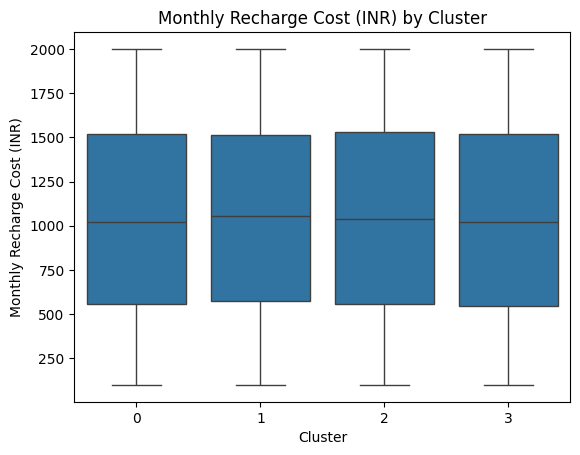

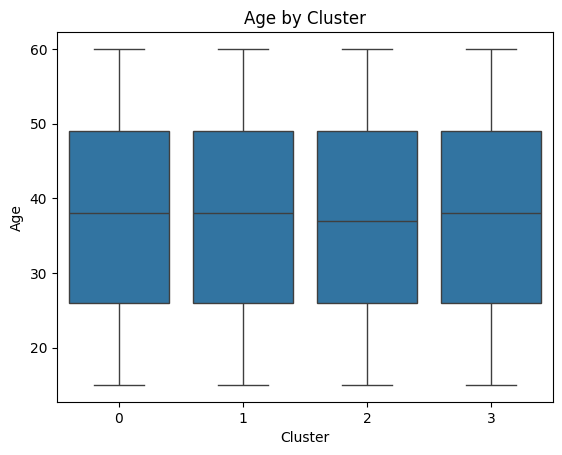

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Calls Duration (mins/day)',
    'Number of Apps Installed', 'Social Media Time (hrs/day)',
    'E-commerce Spend (INR/month)', 'Streaming Time (hrs/day)',
    'Gaming Time (hrs/day)', 'Monthly Recharge Cost (INR)', 'Age']: 
    sns.boxplot(x='Cluster', y=col, data=final_df)
    plt.title(f'{col} by Cluster')
    plt.show()


In [28]:
for c in final_df['Cluster'].unique():
    cdf = final_df[final_df['Cluster'] == c]
    for col in ['Primary Use', 'Location', 'Phone Brand']:
        print(f"Cluster {c} {col}: {cdf[col].mode()[0]}")


Cluster 0 Primary Use: 1
Cluster 0 Location: 0
Cluster 0 Phone Brand: 3
Cluster 1 Primary Use: 2
Cluster 1 Location: 1
Cluster 1 Phone Brand: 4
Cluster 2 Primary Use: 4
Cluster 2 Location: 5
Cluster 2 Phone Brand: 9
Cluster 3 Primary Use: 0
Cluster 3 Location: 2
Cluster 3 Phone Brand: 0


In [19]:
# Metrics

from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
ch_score = calinski_harabasz_score(X_scaled, final_df['Cluster'])
print("Calinski-Harabasz Score:", ch_score)

db_score = davies_bouldin_score(X_scaled, final_df['Cluster'])
print("Davies_Bouldin Score:", db_score)



Calinski-Harabasz Score: 2252.478574396501
Davies_Bouldin Score: 2.126589794446925


In [13]:
import pickle
with open('best_kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)


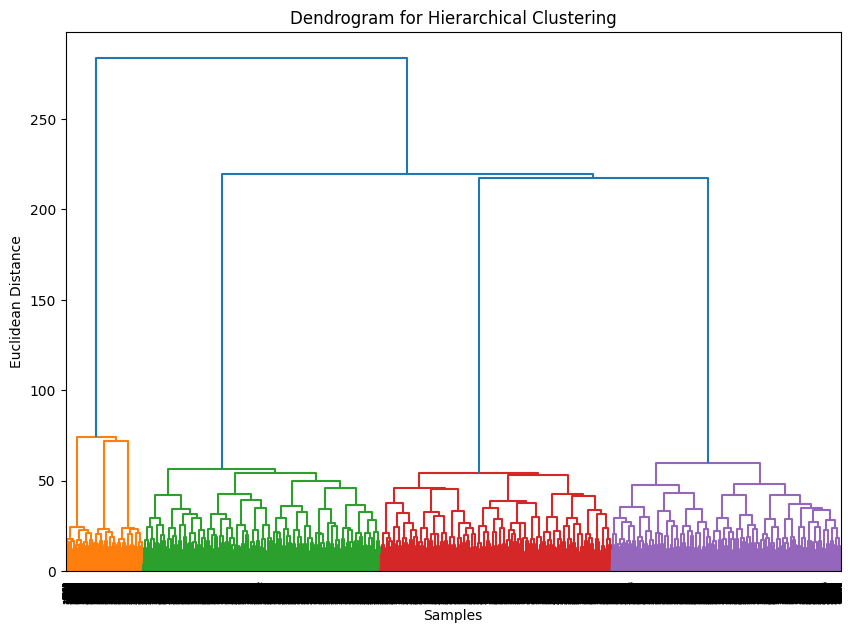

In [20]:
# Hierarchical Clustering

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

In [21]:
# By cutting around 200, crossed four tall branches

from sklearn.cluster import AgglomerativeClustering

best_k = 4
hc_model = AgglomerativeClustering(n_clusters=best_k, metric='euclidean', linkage='ward')
final_df['HC_Cluster'] = hc_model.fit_predict(X_scaled)

In [22]:
final_df.head()


,Age,Location,Phone Brand,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Gender_Female,Gender_Male,Gender_Other,OS_Android,OS_iOS,Cluster,HC_Cluster
0,53,8,8,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,0,0.0,1.0,0.0,1.0,0.0,0,1
1,60,3,6,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,2,0.0,0.0,1.0,1.0,0.0,1,3
2,37,0,3,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,1,1.0,0.0,0.0,1.0,0.0,2,2
3,32,9,7,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,1,0.0,1.0,0.0,1.0,0.0,0,1
4,16,8,9,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,3,0.0,1.0,0.0,1.0,0.0,0,1


In [22]:
# Evaluate the silhouette score

from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, final_df['HC_Cluster'])
print(f"Silhouette Score for Hierarchical Clustering (k={best_k}): {score:.3f}")

Silhouette Score for Hierarchical Clustering (k=4): 0.154


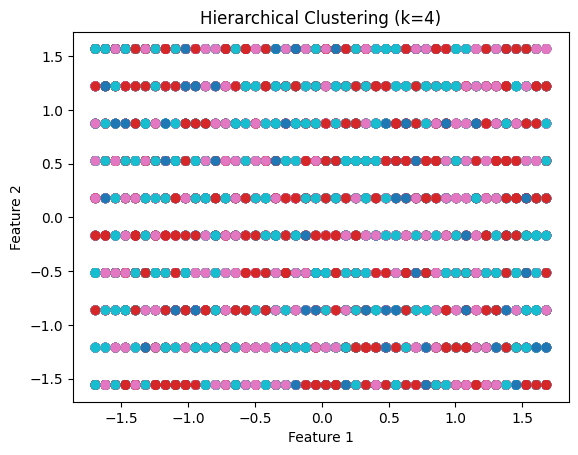

In [23]:
# Visualise the scatter plot

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=final_df['HC_Cluster'], cmap='tab10')
plt.title(f'Hierarchical Clustering (k={best_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [24]:
# Metrics

from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
ch_score = calinski_harabasz_score(X_scaled, final_df['HC_Cluster'])
print("Calinski-Harabasz Score:", ch_score)

db_score = davies_bouldin_score(X_scaled, final_df['HC_Cluster'])
print("Davies_Bouldin Score:", db_score)


Calinski-Harabasz Score: 2252.478574396501
Davies_Bouldin Score: 2.126589794446925


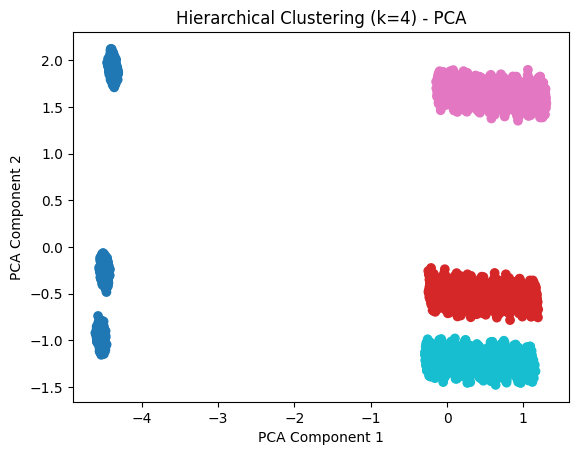

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Plot clusters in PCA space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_df['HC_Cluster'], cmap='tab10')
plt.title(f'Hierarchical Clustering (k={best_k}) - PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [26]:
# to get the mode for the Primary Use

hc_cluster_primary_use = final_df.groupby('HC_Cluster')['Primary Use'].agg(lambda x: x.mode()[0])
print(hc_cluster_primary_use)


HC_Cluster
0    0
1    1
2    4
3    2
Name: Primary Use, dtype: int64


In [27]:
cluster_sizes = final_df['HC_Cluster'].value_counts()
print(cluster_sizes)

class_map = {0: 'Education', 1: 'Entertainment', 2: 'Gaming', 3: 'Social media', 4: 'Work'}

result = final_df.groupby('HC_Cluster')['Primary Use'].agg(lambda x: x.mode()[0])
result_named = result.map(class_map)
print(result_named)


HC_Cluster
2    5426
3    5259
1    5226
0    1775
Name: count, dtype: int64
HC_Cluster
0        Education
1    Entertainment
2             Work
3           Gaming
Name: Primary Use, dtype: object


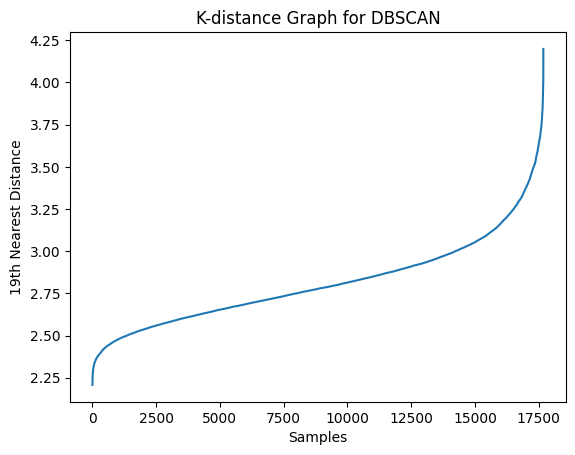

In [28]:
# DBSCAN Clustering

from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=19)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 18])
plt.plot(distances)
plt.xlabel('Samples')
plt.ylabel(f'{19}th Nearest Distance')
plt.title('K-distance Graph for DBSCAN')
plt.show()


In [29]:
# elbow appears to be slightly above 2.25 and below 2.75, considering eps=2.50
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.25, min_samples=19)
dbscan_labels = dbscan.fit_predict(X_scaled)

final_df['DBSCAN_Cluster'] = dbscan_labels  


In [30]:
import numpy as np
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f'Estimated clusters: {n_clusters}')
print(f'Noise points: {n_noise}')


Estimated clusters: 2
Noise points: 18


In [31]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
print("Silhouette Score:", silhouette_score(X_scaled, dbscan_labels))
print("Calinski-Harabasz:", calinski_harabasz_score(X_scaled, dbscan_labels))
print("Davies-Bouldin:", davies_bouldin_score(X_scaled, dbscan_labels))


Silhouette Score: 0.23674772105551417
Calinski-Harabasz: 1281.6141367819962
Davies-Bouldin: 4.4290901268057725


Silhouette Score cannot be negative


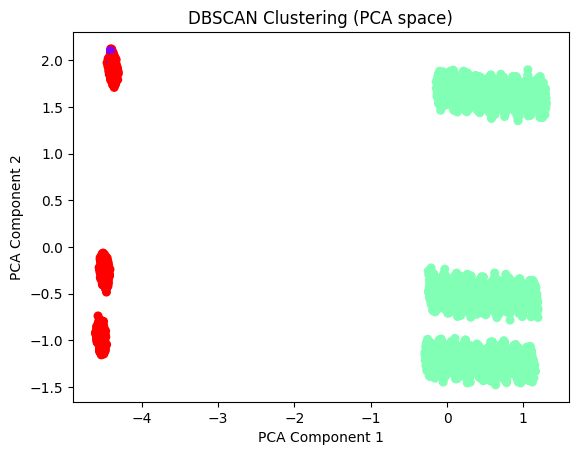

In [32]:
# Scatter plot to visualise the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='rainbow', s=30)
plt.title('DBSCAN Clustering (PCA space)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [33]:
DBSCAN_cluster_primary_use = final_df.groupby('DBSCAN_Cluster')['Primary Use'].agg(lambda x: x.mode()[0])
print(DBSCAN_cluster_primary_use)


DBSCAN_Cluster
-1    3
 0    0
 1    0
Name: Primary Use, dtype: int64


-1 is for the noise group


In [34]:
cluster_sizes = final_df['DBSCAN_Cluster'].value_counts()
print(cluster_sizes)

class_map = {0: 'Education', 1: 'Entertainment', 2: 'Gaming', 3: 'Social media', 4: 'Work'}

result = final_df.groupby('DBSCAN_Cluster')['Primary Use'].agg(lambda x: x.mode()[0])
result_named = result.map(class_map)
print(result_named)


DBSCAN_Cluster
 0    15911
 1     1757
-1       18
Name: count, dtype: int64
DBSCAN_Cluster
-1    Social media
 0       Education
 1       Education
Name: Primary Use, dtype: object


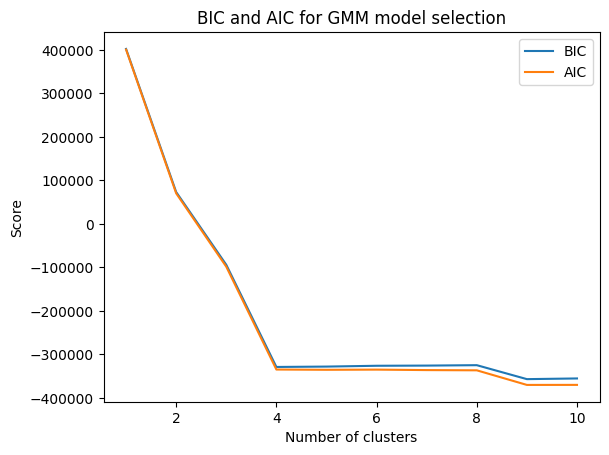

In [35]:
# Gaussian Mixture Clustering Model

import numpy as np
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 11)
bics = []
aics = []
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))
    aics.append(gmm.aic(X_scaled))

# Plot BIC/AIC vs number of components to choose optimal model
import matplotlib.pyplot as plt
plt.plot(n_components_range, bics, label='BIC')
plt.plot(n_components_range, aics, label='AIC')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()
plt.title('BIC and AIC for GMM model selection')
plt.show()


In [36]:
best_n = 4
gmm = GaussianMixture(n_components=best_n, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)          
gmm_probs = gmm.predict_proba(X_scaled)         

final_df['GMM_Cluster'] = gmm_labels


In [37]:
# metrics

print("Silhouette Score:", silhouette_score(X_scaled, gmm_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, gmm_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, gmm_labels))


Silhouette Score: 0.15394867418694486
Calinski-Harabasz Score: 2252.478574396501
Davies-Bouldin Index: 2.126589794446925


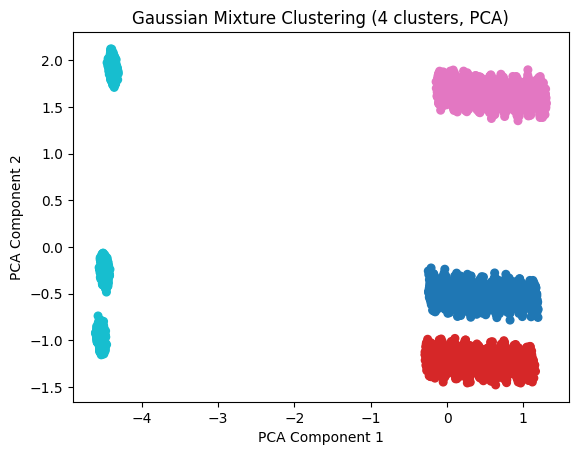

In [38]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2).fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='tab10', s=30)
plt.title(f'Gaussian Mixture Clustering ({best_n} clusters, PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [39]:
GMM_primary_use = final_df.groupby('GMM_Cluster')['Primary Use'].agg(lambda x: x.mode()[0])
print(GMM_primary_use)

GMM_Cluster
0    1
1    2
2    4
3    0
Name: Primary Use, dtype: int64


In [40]:
cluster_sizes = final_df['GMM_Cluster'].value_counts()
print(cluster_sizes)

class_map = {0: 'Education', 1: 'Entertainment', 2: 'Gaming', 3: 'Social media', 4: 'Work'}

result = final_df.groupby('GMM_Cluster')['Primary Use'].agg(lambda x: x.mode()[0])
result_named = result.map(class_map)
print(result_named)


GMM_Cluster
2    5426
1    5259
0    5226
3    1775
Name: count, dtype: int64
GMM_Cluster
0    Entertainment
1           Gaming
2             Work
3        Education
Name: Primary Use, dtype: object


In [9]:
# Spectral Clustering Model

from sklearn.cluster import SpectralClustering

n_clusters = 4
spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)

final_df['Spectral_Cluster'] = spectral_labels


In [10]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print("Silhouette Score:", silhouette_score(X_scaled, spectral_labels))
print("Calinski-Harabasz:", calinski_harabasz_score(X_scaled, spectral_labels))
print("Davies-Bouldin:", davies_bouldin_score(X_scaled, spectral_labels))


Silhouette Score: 0.09751683779783543
Calinski-Harabasz: 1565.6116865576073
Davies-Bouldin: 2.8057329566763825


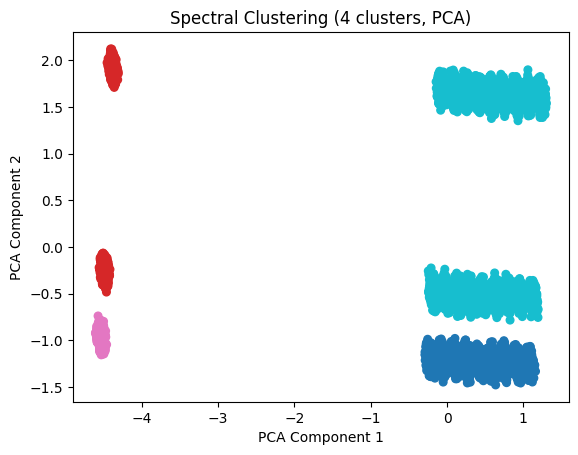

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_pca = PCA(n_components=2).fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=spectral_labels, cmap='tab10', s=30)
plt.title(f'Spectral Clustering ({n_clusters} clusters, PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [12]:
SCM_primary_use = final_df.groupby('Spectral_Cluster')['Primary Use'].agg(lambda x: x.mode()[0])
print(SCM_primary_use)

Spectral_Cluster
0    2
1    0
2    2
3    4
Name: Primary Use, dtype: int64


In [13]:
cluster_sizes = final_df['Spectral_Cluster'].value_counts()
print(cluster_sizes)

class_map = {0: 'Education', 1: 'Entertainment', 2: 'Gaming', 3: 'Social media', 4: 'Work'}

result = final_df.groupby('Spectral_Cluster')['Primary Use'].agg(lambda x: x.mode()[0])
result_named = result.map(class_map)
print(result_named)

Spectral_Cluster
3    10652
0     5259
1     1142
2      633
Name: count, dtype: int64
Spectral_Cluster
0       Gaming
1    Education
2       Gaming
3         Work
Name: Primary Use, dtype: object
